# Differentialrechung und Optimierung mit Python

## Numerische Ableitung
In diesem Abschnitt wollen wir noch einmal die Numerische Ableitung Schritt für Schritt behandeln. Wir betrachten dazu die Funktion
$$ y = \frac{1}{2}(x-2)^2 $$

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

x = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4])
y = 0.5*(x-2)**2

display(x)
display(y)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

array([2.   , 1.125, 0.5  , 0.125, 0.   , 0.125, 0.5  , 1.125, 2.   ])

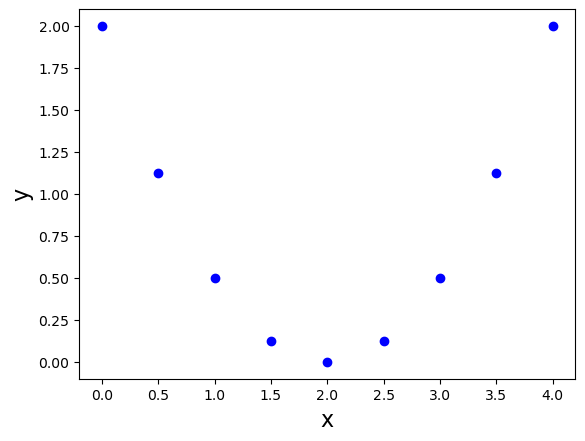

In [23]:
plt.plot(x,y,'ob');
plt.xlabel('x',fontsize=16);
plt.ylabel('y',fontsize=16);

**Euler Methode**

Bei der Euler Methode nähern wir 
$$  \frac{dy[i]}{dx[i]} = \frac{y[i+1]-y[i]}{x[i+1]-x[i]} $$

**Backward Euler Methode**

Bei der Backward Euler Methode nähern wir 
$$  \frac{dy[i]}{dx[i]} = \frac{y[i]-y[i-1]}{x[i]-x[i-1]} $$

**Aufgabe**:

Bestimmen Sie numerisch die Ableitung für beide Fälle und plotten Sie die Funktionswerte zusammen mit der numerisch berechneten Ableitung sowie der analytisch berechneten Ableitung

Sie sollten das folgende Ergebnis erhalten:

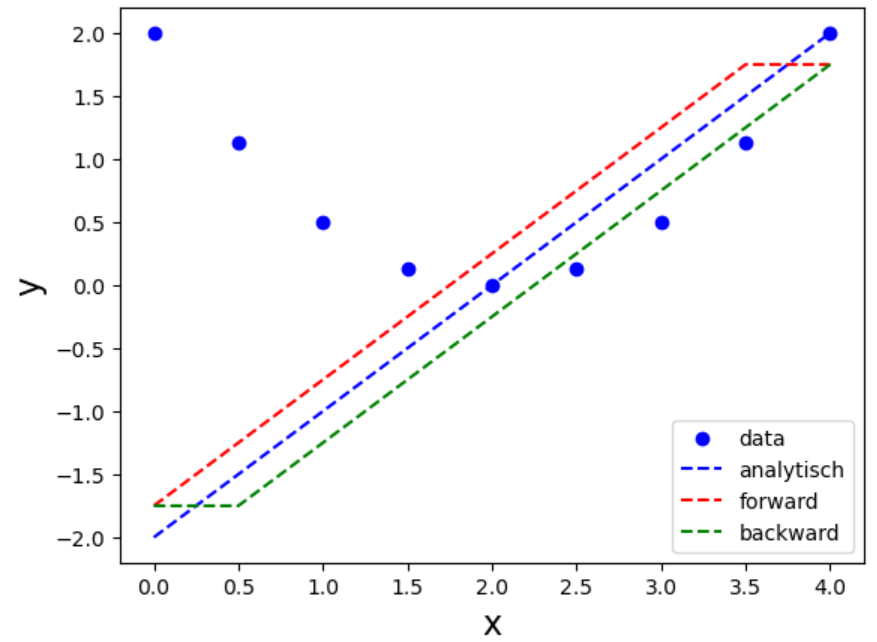

## Das Gradientenabstiegsverfahren

Gegeben ist die Funktion $f(x) = x-10*e^{-\frac{1}{10}(x-2)^2}$.

Wir wollen uns zunächst anschauen wie die Funktion aussieht.  
Dazu definieren wir eine Lambda Funktion und plotten die Funktion im Bereich $x \in [-8,8]$.


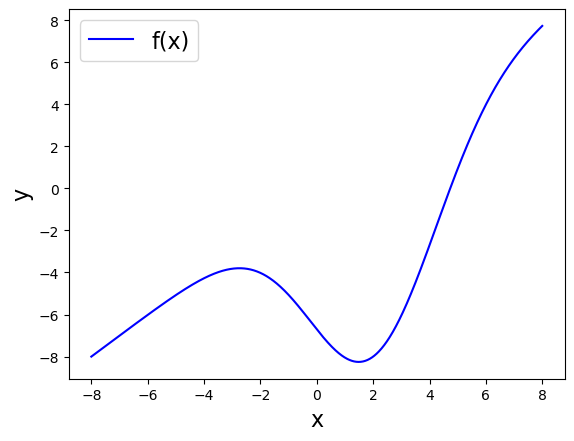

In [5]:
f  = lambda x: x- 10*np.exp(-0.1*(x-2)**2)

xmin = -8; xmax = 8
x = np.linspace(xmin,xmax,1000)
plt.plot(x,f(x),'b-',label = 'f(x)')
plt.xlabel('x',fontsize = 16); plt.ylabel('y',fontsize = 16)
plt.legend(prop={'size': 16})
plt.show()

Wir wollen nun mit Hilfe des Gradientenabstiegsverfahren das lokale Minimum im Bereich $[0,4]$ finden.


**Aufgabe**  
Füllen Sie die Funktion grad_abstieg mit Ihrem Code so, dass diese mit dem in der Vorlesung präsentierten
Gradienten Abstiegsverfahren das Minimum einer Funktion f findet. Ändern Sie nicht die Struktur der Eingabe, 
der Ausgabe oder andere bereits gegebene Parameter.  
Die gegebenen Paramter können Ihnen helfen, aber Sie müssen diese nicht zwingend verwenden wenn Sie 
eine andere/bessere Idee haben das Verfahren zu implementiere

In [6]:
def grad_abstieg(f,x0,alpha,Nmax):
    #Bestimmt das Minimum der Funktion f mit Hilfe des Gradienten Abstiegsverfahren.
    
    #INPUT
    # f      lambda funktion    Funktion die Minimiert werden soll
    # x0     float              Startwert für das Verfahren
    # alpha  float              Anfangs-Schrittweite
    # Nmax   int                Maximale Anzahl an Interationen
    

    #OUTPUT
    # OutData panda DataFrame mit Spalten
    # n         int     Iterationsschritt (0,1,2,3...)
    # xn        float   x-Wert für jeden neuen Iterationsschritt
    # f(xn)     float   Funktionswert für aktuellen x-Wert
    # alpha     float   Schrittweite für jeweiligen Iterationsschritt
    
    
    Nmax_inner = 50 # Schrittweite soll pro Iteration maximal 50mal angepasst werden
    dx = min([1e-8,alpha/10]) # dx um Ableitung für Abstiegsrichtung zu berechnen
    df_min = 1e-12            # Unterschied in Funktionswert als Stoppkriterium
    dx_min = 1e-12            # Unterschied in x-Werten als Stoppkriterium
  
    #Initialisiere OutData als pandas DataFrame
    OutData = pd.DataFrame(data = {'n':      0, 
                                   'xn':    x0,
                                   'f(xn)': f(x0),
                                   'alpha': alpha},
                           index = [0])
    
    
    cnt = 0 ; delta_x = 1; delta_f = 1;
    xn = x0
    while (cnt < Nmax) & (delta_x > dx_min) & (delta_f>df_min):
        cnt = cnt+1

        #XXX Your Code here!!!
        
        OutData.loc[cnt] = [cnt, xn,f(xn),alpha]
        
    if cnt == Nmax:
        print('Warning: Maximum Number of Iterations reached, convergence not guaranteed')

    return(OutData)

**Aufgabe**
- Finden Sie das lokale Minimum mit geeigneten Startparametern mit Hilfe der Funktion grad_abstieg.
- Finden Sie das lokale Minimum mit Hilfe der scipy Funktion minimize_scalar()

In [9]:
#Lösung

**Aufgabe**

Überlegen Sie sich für welche Startwerte das Verfahren nicht konvergiert unabhängig der anderen Eingabedaten.   
Geben Sie die die Menge der Startwerte an für die das Verfahren nicht konvergiert.   
Hinweis: Sie können die Funktion grad_abstieg() verwenden um die Menge der Startwerte zu bestimmen  

In [10]:
#Lösung

## Anwendungsbeispiel COVID Simulation (SIR Modell)
Als Anwedungsbeispiel für die numerische Differentialrechnung wollen wir uns mit einer Implementation des SIR Modells beschäftigen. Dieses Notebook beruht auf der Webseite https://python.quantecon.org/sir_model.html.

(Hier geht es um die Lösung von Differentialgleichungen, nicht um das Ableiten einer Funktion)

### Theoretische Grundlagen
Das SIR Model wird allgemein für die Ausbreitung von Infektionskrankheiten verwendet. Dabei wird die Bevölkerung in folgende Gruppen eingeteilt: 

  * S: susceptible (empfänglich)
  * I: infected  (infiziert)
  * R: recovered/removed  (nicht empfänglich)

Im Zeitverlauf durchlaufen die Mitglieder der Bevölkerung die Gruppen wie folgt: $S\rightarrow I \rightarrow R$ Wir gehen davon aus, dass die Gesamtbevölkerung konstant ist, d.h. weder Zuwanderung/Abwanderung oder natürliche Zunahme/Abnahme die nicht in Verbindung mit der betrachteten Krankheit steht. Dann ist

$N = S(t)+I(t)+R(t)$ 

Die Anzahl derjenigen die sich in einem bestimmten Zeitraum neu Infizieren ist proportional zur Zeitdauer, der Anzahl derjenigen die schon infiziert sind als auch die Wahrscheinlichkeit, dass sich jemand neues Infiziert. wieviele Personen noch da sind, die sich Infizieren können. In math. Schreibweise ist dies: 

$\Delta I_+ = \beta \cdot I(t)\cdot S(t)\cdot \Delta t$

Dies ist also die positive Änderung von $I(t)$. Außerdem verliert die Gruppe der Infizierten Anteile an R(t) durch Genesung oder Tod. Diese Änderung ist porportional zur Anzahl der Infizierten und der Zeitdauer (Wir gehen hier davon aus, dass $\Delta t$ deutlich kleiner ist als die Zeit bist zur Genesung, dies stellt kein Problem dar, da wir am Ende den Grenzwert $\Delta t \rightarrow 0 $ nehmen):

$\Delta I_- = \gamma \cdot I(t)\cdot \Delta t$

Für die Änderungen der einzelnen Gruppen finden wir somit

$\Delta I = \Delta I_+ - \Delta I_-$ <br>
$\Delta S = -\Delta I_+ $ <br>
$\Delta R = \Delta I_- $ <br>

Wenn wir jede dieser Gleichungen durch $\Delta t$ teilen und den Grenzwert $\Delta t \rightarrow 0$ nehmen erhalten wir das folgende System an gewöhnlichen Differentialgleichungen:

$\dot S = -\beta \cdot I(t)\cdot S(t)$ <br>
$\dot I =  \beta \cdot I(t)\cdot S(t)-\gamma \cdot I(t)$ <br>
$\dot R =  \gamma \cdot I(t)$ 

Unsere Gleichungen hier sind identisch mit den Gleichungen im Skript von Prof. Nürnberg auf Seite 8 wenn diese noch durch die Gesamtbevölkerung N geteilt werden.

$\beta$  beschreibt die Infektiosität der Krankheit

$\gamma$ ist ein Maß dafür wie lange es dauert bis Infizierte Genesen bzw. wie lange es dauert bis diese Isoliert werden und keine weiteren Personen mehr anstecken können. Wir setzen $\gamma = \frac{1}{g}$ wobei $g$ die durchschnittliche Anzahl der Tage ist die es für eine Genesung benötigt.

Ob sich eine Epidemie ausbreitet oder zum erliegen kommt liegt am Verhältnis 

$\frac{\Delta I_+}{\Delta I_-} = \frac{\beta \cdot I(t)\cdot S(t)\cdot \Delta t}{\gamma \cdot I(t)\cdot \Delta t}
= \frac{\beta}{\gamma}S(t)$

Zu Anfang der Epidemie gilt $S(t) \approx 1$ (alle können sich anstecken) und man definiert die **Basisreproduktionszahl**

$R_0 = \frac{\beta}{\gamma}$

$R_0$ ist die durchschnittliche Anzahl an Personen die von einem Infizierten angesteckt werden. Ist diese Zahl kleiner 1, dann kommt die Epidemie schnell zum erliegen. Zu späteren Zeiten gilt $S(t) \approx 1$ nicht mehr und ob sich eine Epidemie weiter ausbreitet oder zum erliegen kommt entscheidet dann die **effektive Reproduktionszahl**

$R_{eff} = R_0 \cdot S \left \{ \begin{array}{ll} > 1 &\text{Epidemie breitet sich aus} \\ < 1 &\text{Epidemie kommt zum erliegen} \end{array} \right.$

Damit sich eine Epidemie also nicht weiter ausbreitet muss entweder $R_0$ klein genug sein (jeder Infizierte steckt so wenig wie möglich andere an -> Quaratäne) oder der Anteil der Bevölkerung die infiziert werden können wird reduziert (durch Infektion oder Impfung). Herdenimunität ist die Tatsache, dass genügend Personen der Bevölkerung Imunität gegen ein Virus haben, so dass sich dieses nicht weiter ausbreiten kann. Wir sehen, dass in diesem Fall $R_{eff} <1$ gelten muss.
Damit finden wir für den Anteil der Herdenimunität

$HI = (1-S) = 1-\frac{R_{eff}}{R_0} > 1-\frac{1}{R_0}$

Bei SARS-COV-2 ist $R_0 \approx 3$ und bei Masern $R_0 \approx 15$. Dass bedeutet für die Herdenimunität:

COVID: $HI > \frac{2}{3} \approx 66\%$

Masern: $HI> \frac{14}{15} \approx 93\%$

Damit erklärt sich auch die Impfpflicht für Masern im Kindergarten

### Numerische Lösung

#### Forward Euler
Wenn wir Forward Euler für die Ableitungen verwenden erhalten wir für unsere Differentialgleichungen
$$
\begin{aligned}
S_{n+t} &= S_n- \left (\beta \cdot I_n \cdot S_n \right )\cdot \Delta t \\
I_{n+t} &= I_n+ \left ( \beta \cdot I_n \cdot S_n -\gamma I_n \right )\cdot \Delta t \\
R_{n+t} &= R_n + \gamma I_n \cdot \Delta t
\end{aligned}
$$
Wenn wir also unsere Anteile zum Zeitpunkt $n$ können wir dierekt die Anteile zum Zeitpunkt $n+1$ ausrechnen.

#### Backward Euler
Beim Backward Euler erhält man
$$
\begin{aligned}
S_{n+t} &= S_n- \left (\beta \cdot I_{n+1} \cdot S_{n+1} \right )\cdot \Delta t \\
I_{n+t} &= I_n+ \left ( \beta \cdot I_{n+1} \cdot S_{n+1} -\gamma I_{n+1} \right )\cdot \Delta t \\
R_{n+t} &= R_n + \gamma I_{n+1} \cdot \Delta t
\end{aligned}
$$
Jetzt ist es nicht mehr so einfach die Anteile zum neuen Zeitpunkt $n+1$ aus dem Zeitpunkt $n$ zu berechnen. Wir können jeweils nach $S_{n+1}$ bzw. $I_{n+t}$ umstellen und erhalten
$$
\begin{aligned}
S_{n+t} &= \frac{S_n}{1+\beta I_{n+1}\Delta t} \approx  \frac{S_n}{1+\beta I_{n}\Delta t}  \\
I_{n+t} &= \frac{I_n}{1-\left(\beta S_{n+1}-\gamma \right)\Delta t} \approx \frac{I_n}{1-\left(\beta S_{n}-\gamma \right)\Delta t} \\
R_{n+t} &= R_n + \gamma I_{n+1} \cdot \Delta t
\end{aligned}
$$
In dieser Form können wir auch wieder aus den Anteilen zum Zeitpunkt $n$ die Anteile zum neuen Zeitpunkt $n+1$ berechnen.

Im folgenden Abschnitt definieren wir die benötigten Funktionen

In [29]:
#verwendete Pakete
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size


# Definition der Ableitungen
def forward_euler(Sn,In,Rn,beta,gamma,dt):
    Snp1 = Sn-beta*In*Sn*dt
    Inp1 = In+(beta*In*Sn-gamma*In)*dt
    Rnp1 = Rn + gamma*In*dt
    
    return Snp1,Inp1,Rnp1


def backward_euler(Sn,In,Rn,beta,gamma,dt):
    Snp1 = Sn/(1+beta*In*dt)
    Inp1 = In/(1-(beta*Sn-gamma)*dt)
    Rnp1 = Rn + gamma*Inp1*dt
    
    return Snp1,Inp1,Rnp1


def plot_paths(paths, labels, times):
    #aus https://python.quantecon.org/sir_model.html
    
    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='best')

    plt.show()
    
STEP_BY_METHOD = {'forward': forward_euler,
                  'backward': backward_euler}

def simulate_SIR(method,g,R0,Nt,dt,StartWerte):
    #macht eine einfache SIR Simulation und plottet das Ergebnis
    
     # Abgeleitete Parameter
    gamma = 1/g
    beta = R0*gamma
    Nsteps = round(Nt/dt)

    #Initialisierung
    S = np.zeros(Nsteps+1)
    I = np.zeros(Nsteps+1)
    R = np.zeros(Nsteps+1)    
    (S[0],I[0],R[0]) = StartWerte

    STEP = STEP_BY_METHOD[method]
    for tt in range(1,Nsteps+1):
        S[tt],I[tt],R[tt] = STEP(S[tt-1],I[tt-1],R[tt-1],beta,gamma,dt)
        
    return S,I,R
    

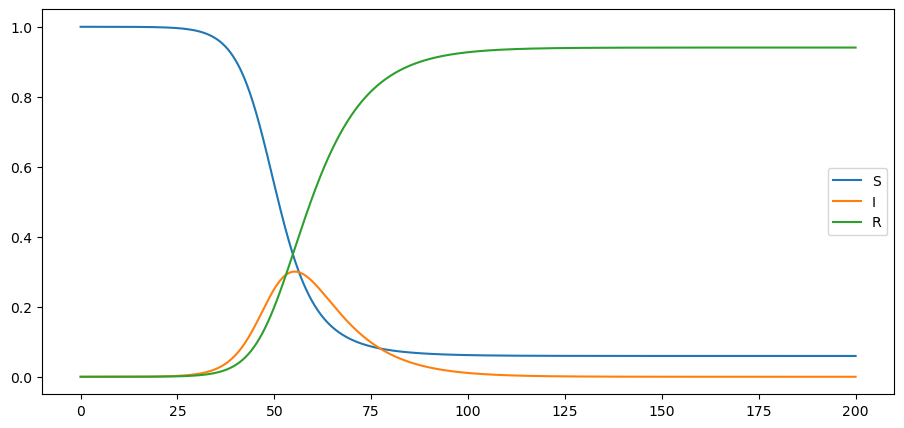

In [30]:
# Wahl der Parameter
Nt = 200 # Zeitdauer der Simulation (Tagen)
R0 = 3 # Basisreproduktionszahl (Wieviele andere Personen werden von einem Infizierten Angesteckt)
g = 9  # Genesungszeit (Tagen)
dt = 1e-3 #Zeitschritt (Tagen)

#Startpopulationen

Istart = 1/100000  #Infizierte am Anfang
Sstart = 1-Istart
Rstart = 0

StartWerte = (Sstart,Istart,Rstart)

#Simulation
method = 'backward'
S,I,R = simulate_SIR(method,g,R0,Nt,dt,StartWerte)

#graphische Darstellung
tvec = np.linspace(0,Nt,len(S))
plot_paths((S,I,R), ('S','I','R'), tvec)

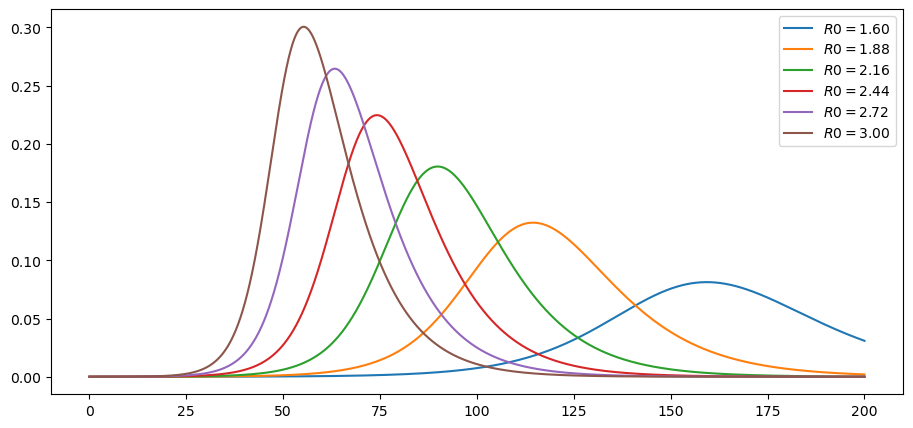

In [31]:
#Abhängigkeit des Infektionsgeschehens vom R-Wert
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths = []

for r in R0_vals:
    method = 'forward'
    S,i_path,R = simulate_SIR(method,g,r,Nt,dt,StartWerte)
    i_paths.append(i_path)
    
plot_paths(i_paths, labels,tvec)

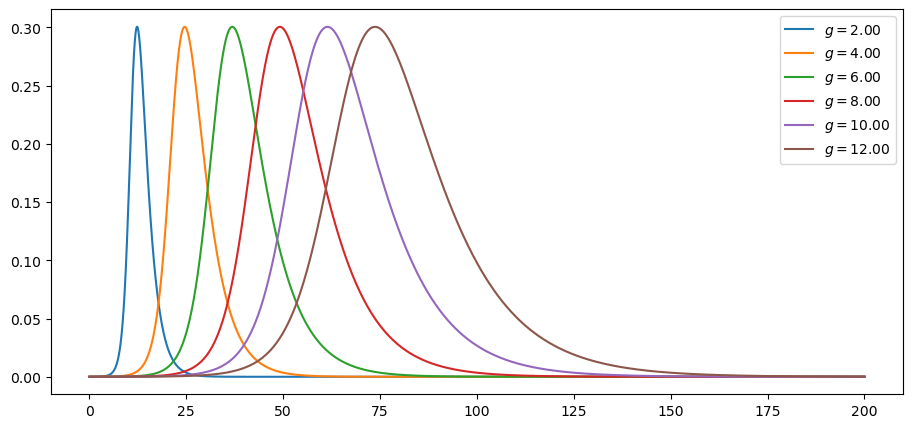

In [32]:
#Abhängigkeit des Infektionsgeschehens vom Genesungszeit g
g_vals = np.linspace(2, 12, 6)
labels = [f'$g = {g:.2f}$' for g in g_vals]
i_paths = []

for g in g_vals:
    method = 'forward'
    S,i_path,R = simulate_SIR(method,g,R0,Nt,dt,StartWerte)
    i_paths.append(i_path)
    
plot_paths(i_paths, labels,tvec)

### Ausblick
Das hier präsentierte Modell beschreibt qualitativ das Infektionsgeschehen bei einer Epidemie. Folgende Erweiterungen sind relativ einfach zu implementieren und sind als Idee für den motivierten Leser gedacht:
- zeitabhändige Parameter $\beta$ und $\gamma$
- Möglichkeit einer mehrfachen Infektion
- Erweitern Sie das Modell noch um die Gruppe E wie in https://python.quantecon.org/sir_model.html
- Verwenden Sie wie in https://python.quantecon.org/sir_model.html scipy um die Differentialgleichungen zu lösen
- usw. ...